<h1>NLP Analysis and Deep Neural Networks Modelling on Mental Health Corpus</h1>
<h3>Labeled sentences about depression and axiety</h3>

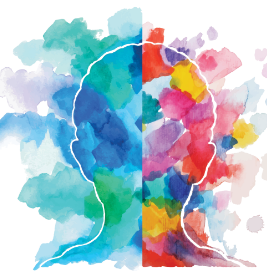

<h2>About dataset</h2>
The Mental Health Corpus is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. The corpus can be used for a variety of purposes, such as sentiment analysis, toxic language detection, and mental health language analysis. The data in the corpus may be useful for researchers, mental health professionals, and others interested in understanding the language and sentiment surrounding mental health issues.
<h3>Main source of dataset :</h3>
https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus
@REIHANEHNAMDARI

<h2>Steps :</h2>

1. Libraries
2. Dataset analysis and information
3. Pre_processing
4. World Cloud
5. Making a dataset
6. featuer scoring by PCA
7. Modelling by Neuralnetwork

<h2>Libraries</h2>

In [ ]:
!pip install prince
!pip install preprocessing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from nltk.stem import PorterStemmer
from sklearn.utils import shuffle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import numpy as np 
import warnings
import string
import prince
import nltk
import re
warnings.filterwarnings("ignore")


<h2>Loading dataset:<h2>

In [ ]:
#Loading dataset:
df = pd.read_csv('/kaggle/input/mental-health-corpus/mental_health.csv')

In [ ]:
df

<h2>Dataset analysis and information</h2>

In [ ]:
df.info()

<h1>Number of targets</h1>

In [ ]:
sns.countplot(x = df['label'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

<h3>Data shuffeling and Sampling</h3>

In [ ]:

df = shuffle(df)
N = df.sample(frac=0.22, replace=False, random_state=1)#Change the rate of frac percentage 
N

<h3>Data pre-processing steps:</h3>

1. <b>Lower</b>
2. <b>Remove numbers</b>
3. <b>Remove punctuation(&,{},[],?,!,etc...)</b>
4. <b>Remove whitespaces</b>
5. <b>Remove stop words(the, an, all,etc....)</b>
6. <b>Remove http adress</b>
7. <b>Tokenization</b>
8. <b>Lemmatization(doe:do,has:have,etc...)</b>


In [ ]:
nltk.download("wordnet", "/kaggle/working/")

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
#////

array = N.to_numpy()#convert to numpy
   
#stop words list
stop_words = set(stopwords.words('english'))

#add other things to stop_words
stop_words.add(',')
stop_words.add('.')
stop_words.add('“')
stop_words.add('’')
stemmer= PorterStemmer()
lemmatizer=WordNetLemmatizer()
l = len(array)

for i in range(l):
    array[i][0] = array[i][0].lower() #Upper to lower
    array[i][0] = ''.join((z for z in array[i][0] if not z.isdigit())) #removing numbers
    array[i][0] = array[i][0].strip() #Removing white space
    array[i][0] = array[i][0].translate(str.maketrans('', '', string.punctuation))#remove Punctuation
    array[i][0] = re.sub('http://\S+|https://\S+', '', array[i][0])#remove http adress
    word_tokens = word_tokenize(array[i][0]) #Tokenize
    array[i][0] = word_tokens 
   
    array[i][0] = [word for word in array[i][0] if not word in stopwords.words()]    
    a = []
    le = len(array[i][0])
  
    for word in array[i][0]:
            
            w1 = stemmer.stem(word)
            w2 = "".join(word)
            #w2 = lemmatizer.lemmatize(word)#lemmatize
            a.append(w2)
            array[i][0] = a
                
    

<h2>Word CLoud of whole Financial Tweets</h2>

In [ ]:
Total_tokens = ''
comment_words = ''
for i in range(l):
    l2 =len(array[i][0])
    for j in range(l2):
        Total_tokens = Total_tokens+' '+array[i][0][j]
        
wordcloud = WordCloud().generate(Total_tokens)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h2> Making a dataset </h2>

Making a unique token 

In [ ]:
string = str(Total_tokens)
token = string.split()
Lenght_of_initialized_token =len(token)
print('initialized token number:',Lenght_of_initialized_token)
token_array = np.array(token)
unique_token = np.unique(token_array)
Lenght_of_unique_token = len(unique_token)
print('Unique token number:',Lenght_of_unique_token)

**Accourding to the tokenization and unique array 2/3 od words are repetitive**

In [ ]:
dataset = []
for i in range(l):
    subset = []
    l2 = len(array[i][0])
    for k in range(Lenght_of_unique_token):
        test = False
        for j in range(l2):
            if array[i][0][j] == unique_token[k]:
                subset.append(True)
                test = True
                break
        if test != True:
            subset.append(False)       
    subset.append(array[i][1]) 
    dataset.append(subset)


In [ ]:
dataset = pd.DataFrame(dataset)
dataset

In [ ]:
X = dataset.iloc[:, :-1].values 
Y = dataset[10754] 
X = pd.DataFrame(X)
X

<h1>Feature selection by PCA</h1>

In [ ]:
def pca(X,Y):
 
    X_train = X  
    y_train = Y
    pca = prince.PCA(
         n_components=20,
         n_iter=10,
         rescale_with_mean=False,
         rescale_with_std=False,
         copy=True,
         check_input=True,
         engine='sklearn',
         random_state=234
     )
    pca = pca.fit(X_train)

    print(pca.eigenvalues_)
    column_headers = list(X_train.columns)
    dset = pd.DataFrame()
    dset['pca'] = range(1,18)
    dset['eigenvalue'] = pd.DataFrame(pca.eigenvalues_)

    print('pca.eigenvalues:')
    print(pca.eigenvalues_)
    print('--------------------')
    print()
    print('Score of each feature:')
    print(pca.explained_inertia_)
    print('\nlist of best feature in model_based methods:\n')
    for i in range(len(pca.explained_inertia_)):
        if pca.explained_inertia_[i]>=0.0045:#set the treasholding
            print(i,column_headers[i])
train_x = X
train_y = Y
pca(train_x,train_y)

<h1>Modelling with Neuralnetworks</h1>

In [ ]:
#Test Neural Network
train_x = X
train_y = Y
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, stratify=train_y,
                                                    random_state=1    ,test_size = 0.1,
                                                  )

clf = MLPClassifier(hidden_layer_sizes=(18,18,8,8,8), activation='relu', random_state=1, max_iter=1000).fit(X_train, y_train)


print(clf.score(train_x, train_y))


<h1>END</h1>